<a href="https://colab.research.google.com/github/bhopchi/Rock_Paper_Scissors_Image_Classification_using_CNN-TensorFlow-.ipynb/blob/main/Rock_Paper_Scissors_Image_Classification_using_CNN(TensorFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [6]:
import os
import random
import numpy as np
from io import BytesIO

# Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

# Interactive widgets
from ipywidgets import widgets

# Inspect the Dataset

In [7]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/rps.zip'  # Replace with the actual path

# Specify the path to the directory where you want to extract the files
extract_dir_path = '/content/RPS.TRAINING'  # Replace with the actual path

# Create the extract directory if it doesn't exist
os.makedirs(extract_dir_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir_path)

# Print the path of the extracted file folder
print(f"Extracted files to: {extract_dir_path}")

Extracted files to: /content/RPS.TRAINING


In [8]:
BASE_DIR = '/content/RPS.TRAINING/rps'

rock_dir = os.path.join(BASE_DIR, 'rock')
paper_dir = os.path.join(BASE_DIR, 'paper')
scissors_dir = os.path.join(BASE_DIR, 'scissors')

print(f'total training rock images: {len(os.listdir(rock_dir))}')
print(f'total training paper images: {len(os.listdir(paper_dir))}')
print(f'total training scissors images: {len(os.listdir(scissors_dir))}')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print()
print(f"5 files in the rock subdir: {rock_files[:5]}")
print(f"5 files in the paper subdir: {paper_files[:5]}")
print(f"5 files in the scissors subdir: {scissors_files[:5]}")

total training rock images: 840
total training paper images: 840
total training scissors images: 840

5 files in the rock subdir: ['rock04-014.png', 'rock03-067.png', 'rock04-035.png', 'rock04-018.png', 'rock03-007.png']
5 files in the paper subdir: ['paper06-004.png', 'paper03-054.png', 'paper07-049.png', 'paper06-081.png', 'paper07-013.png']
5 files in the scissors subdir: ['scissors03-097.png', 'scissors01-044.png', 'scissors01-106.png', 'scissors02-053.png', 'scissors01-068.png']


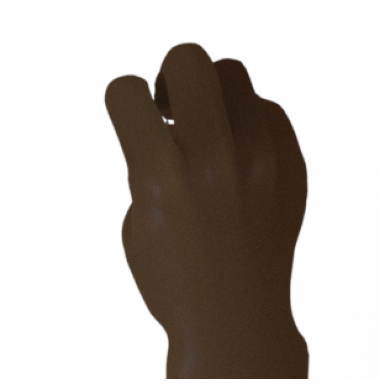

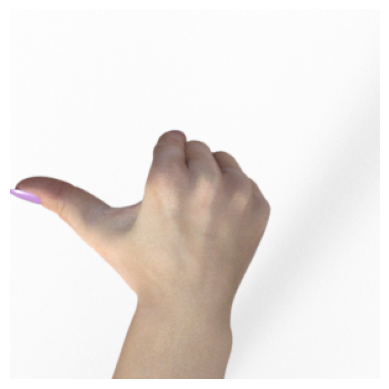

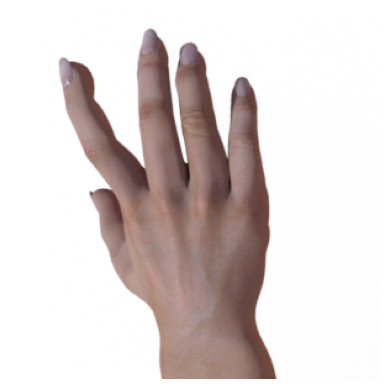

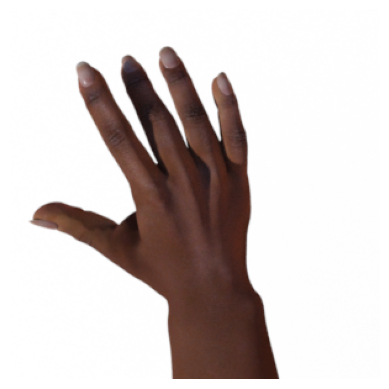

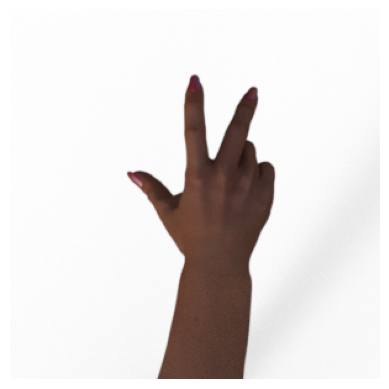

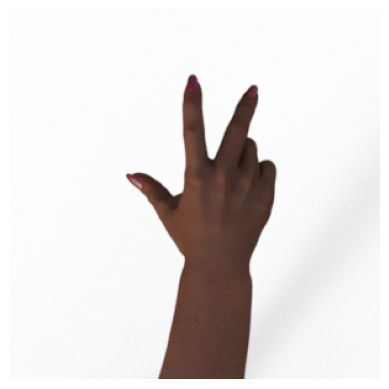

In [9]:
next_rock = [os.path.join(rock_dir, fname)
             for fname in random.sample(rock_files, k=2)]
next_paper = [os.path.join(paper_dir, fname)
              for fname in random.sample(paper_files, k=2)]
next_scissors = [os.path.join(scissors_dir, fname)
                 for fname in random.sample(scissors_files, k=2)]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

# Build the model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    # Rescale the image. Note the input shape is the desired size of the image: 150x150 with 3 bytes for color
    tf.keras.layers.Rescaling(1./255),
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

# Preprocess the Image Data

In [11]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/rps-test-set (1).zip'  # Replace with the actual path

# Specify the path to the directory where you want to extract the files
extract_dir_path = '/content/RPS.TEST_VALIDATION'  # Replace with the actual path

# Create the extract directory if it doesn't exist
os.makedirs(extract_dir_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir_path)

# Print the path of the extracted file folder
print(f"Extracted files to: {extract_dir_path}")

Extracted files to: /content/RPS.TEST_VALIDATION


In [12]:
TRAINING_DIR = "/content/RPS.TRAINING/rps"
VALIDATION_DIR = "/content/RPS.TEST_VALIDATION/rps-test-set"

# Instantiate the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAINING_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical'
    )

# Instantiate the validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical'
    )

# Optimize the datasets for training
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

validation_dataset_final = (validation_dataset
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

Found 2520 files belonging to 3 classes.
Found 372 files belonging to 3 classes.


# Prepare the Model for Training

In [13]:
# Create a model with data augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomTranslation(0.2,0.2),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomZoom(0.2)
    ])

# Attach the data augmentation model to the base model
model_with_aug = tf.keras.models.Sequential([
    data_augmentation,
    model
])

In [14]:
# Set the training parameters
model_with_aug.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Train the model and evaluate the results

In [15]:
# Train the model
history = model_with_aug.fit(
    train_dataset_final,
    epochs=25,
    validation_data = validation_dataset_final,
    verbose = 1
)

Epoch 1/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.3436 - loss: 1.1608 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.3909 - loss: 1.0891 - val_accuracy: 0.6156 - val_loss: 0.9133
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4774 - loss: 1.0402 - val_accuracy: 0.3817 - val_loss: 0.9098
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.5610 - loss: 0.9157 - val_accuracy: 0.7984 - val_loss: 0.5665
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.6363 - loss: 0.7883 - val_accuracy: 0.7016 - val_loss: 0.6600
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7133 - loss: 0.6727 - val_accuracy: 0.9355 - val_loss: 0.3581
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7856 - loss: 0.5862 - val_accuracy: 0.9785 - val_loss: 0.2777
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8041 - loss: 0.4852 - val_accuracy: 0.9382 - 

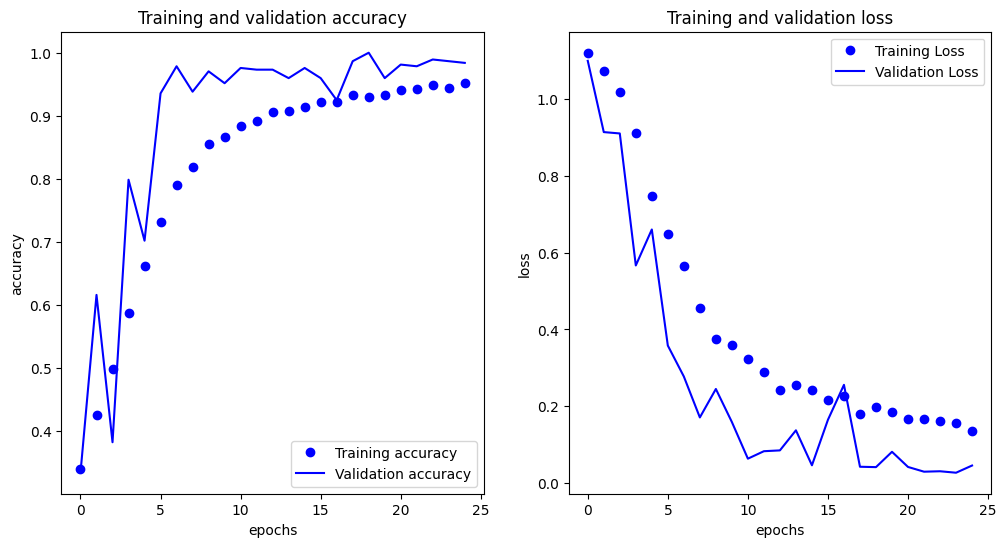

In [16]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig, ax = plt.subplots(1,2, figsize=(12, 6))
  ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
  ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
  ax[0].set_title('Training and validation accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'bo', label='Training Loss')
  ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
  ax[1].set_title('Training and validation loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.show()

plot_loss_acc(history)

## Model Prediction

In [20]:
import io

def on_upload_change(change):
    """ A function for getting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)

    # Accessing content using 'get()' and 'content' methods
    items = change.new
    for filename, file_info in items.items(): # Loop if there is more than one file uploaded
        content = file_info.get('content', None) or file_info.get('content', None)
        if content is not None:
            file_jpgdata = io.BytesIO(content)
            file_predict(filename, file_jpgdata, out)
        else:
            print(f"Could not find content for file: {filename}")

In [24]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0]

    with out:

        print(f'\nmodel output: {prediction}')

        prediction_index = np.argmax(prediction)

        classes = ["paper", "rock", "scissors"]

        predicted_class = classes[prediction_index]

        print(f'{filename} is {predicted_class}')


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)

    items = change.new
    for item in items: # Loop if there is more than one file uploaded
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)


uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()